# **Business Understanding**
SyriaTel, a leading telecommunications company, faces a significant challenge in retaining its customer base. Customer churn, or the loss of customers to competitors, can have a substantial impact on the company's revenue and profitability. Acquiring new customers is generally more expensive than retaining existing ones, making customer retention a critical aspect of SyriaTel's business strategy.

In the highly competitive telecommunications market, customers have numerous options and can easily switch to other service providers if they are dissatisfied with the quality of service, pricing, or other factors. Identifying customers at risk of churning and taking proactive measures to address their concerns can significantly improve customer loyalty and reduce the potential revenue loss associated with churn.

**Main Objective**

To develop a binary classification model that can accurately predict whether a customer will stop doing business with SyriaTel in the near future.

# **Data Understanding**

The dataset "Churn in Telecoms Dataset" is provided by Kaggle and contains information about customer churn in the telecommunications industry. Customer churn refers to the situation when customers stop doing business with a company, in this case, a telecommunications provider. Understanding the factors that contribute to customer churn is crucial for companies to develop effective retention strategies and minimize revenue loss.

**Data Source**
The dataset was originally shared on Kaggle by the user "becksddf" and is available at the following link: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

**Data Description**

The dataset contains 3333 rows and 21 columns. Each row represents a unique customer, and the columns provide various attributes related to the customer's account details, usage patterns, and churn status. The dataset consists of the following columns:

state: The state where the customer resides.
account_length: The number of months the customer has been with the company.
area_code: The area code of the customer's phone number.
phone_number: The customer's phone number.
international_plan: Indicates whether the customer has an international calling plan (Yes or No).
voice_mail_plan: Indicates whether the customer has a voice mail plan (Yes or No).
number_vmail_messages: The number of voice mail messages the customer has received.
total_day_minutes: The total number of minutes the customer has spent on calls during the day.
total_day_calls: The total number of calls the customer has made during the day.
total_day_charge: The total charge for the customer's day calls.
total_eve_minutes: The total number of minutes the customer has spent on calls during the evening.
total_eve_calls: The total number of calls the customer has made during the evening.
total_eve_charge: The total charge for the customer's evening calls.
total_night_minutes: The total number of minutes the customer has spent on calls during the night.
total_night_calls: The total number of calls the customer has made during the night.
total_night_charge: The total charge for the customer's night calls.
total_intl_minutes: The total number of minutes the customer has spent on international calls.
total_intl_calls: The total number of international calls the customer has made.
total_intl_charge: The total charge for the customer's international calls.
customer_service_calls: The number of customer service calls the customer has made.
churn: Indicates whether the customer has churned (TRUE or FALSE ).







# **Exploratory Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, feature_selection
from sklearn import metrics
from sklearn import ensemble, linear_model, svm, tree
import tensorflow as tf  # or import keras
import joblib  # or import pickle
import warnings
import os
import sys


**Loading the Dataset**

In [7]:
# Load the entire Excel file
df = pd.read_excel('Dataset.xlsx')

# Print the loaded data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Exploring the Dataset**

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


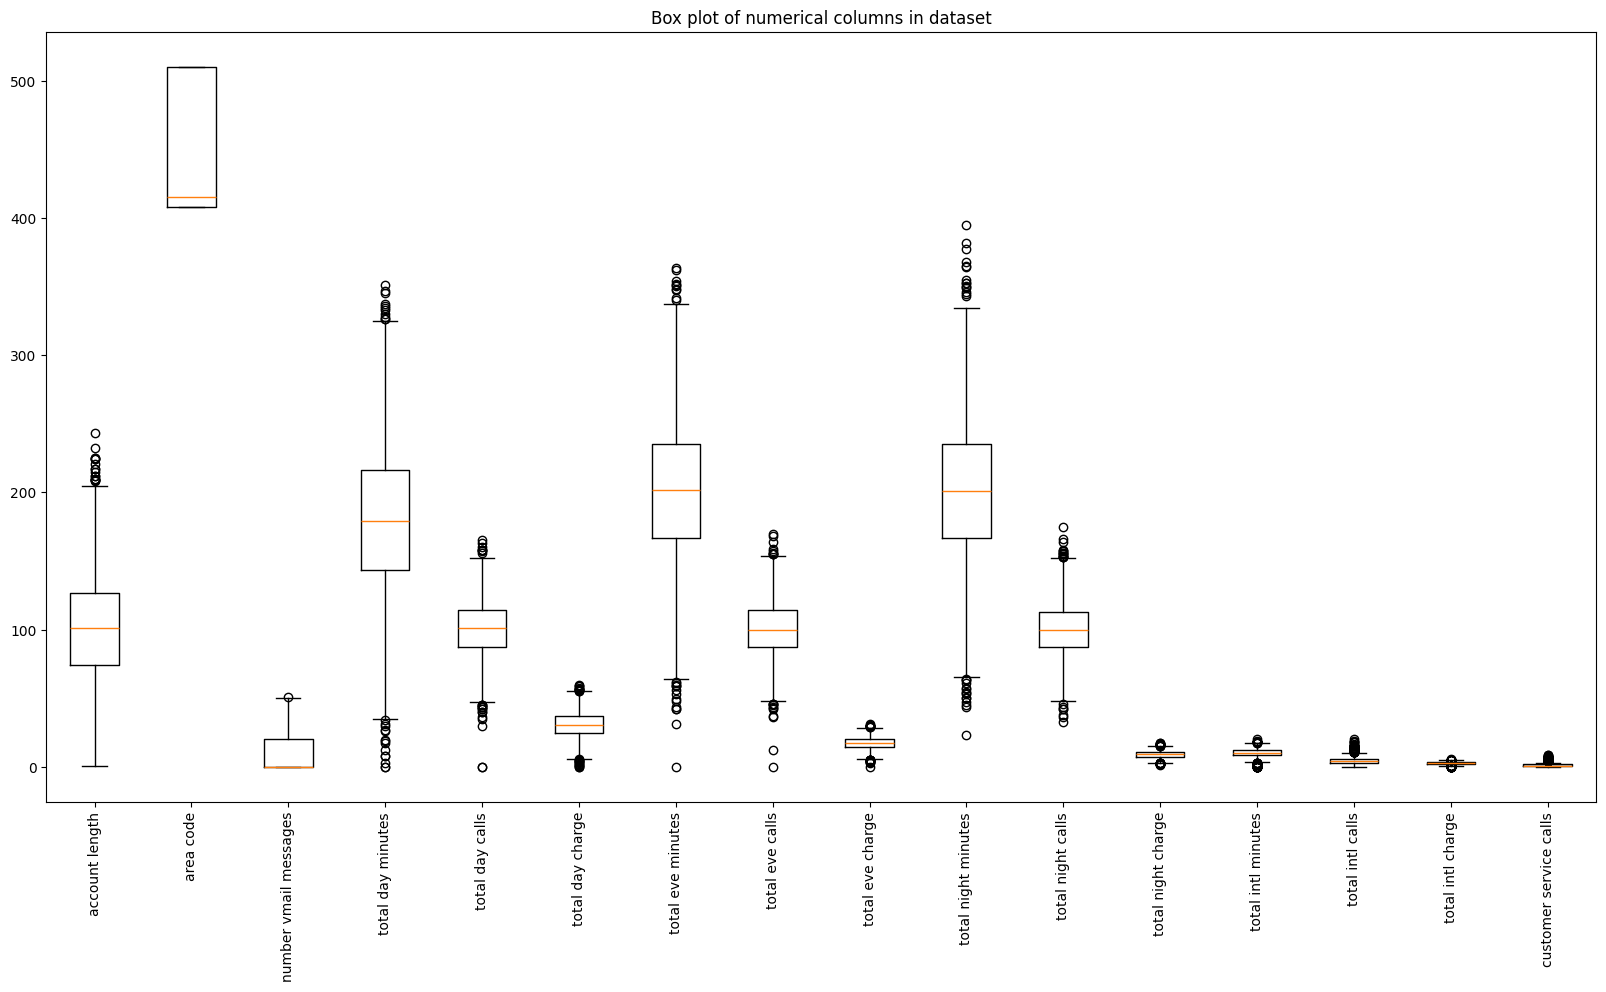

In [12]:
# Explore the dataset
display(df.describe())

# Create a box plot for numerical columns
plt.figure(figsize=(20, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.boxplot([df[col] for col in numerical_cols])
plt.title("Box plot of numerical columns in dataset")
plt.xticks(range(1, len(numerical_cols) + 1), numerical_cols, rotation=90)
plt.show()


**Checking for Missing Values**

In [15]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## **Univariate Analysis**

### **Categorical**

Summary of Value Counts for Categorical Columns:

state:
state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

phone number:
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64

international plan:
international plan
no     3010
yes     323
Name: count, dtype: int64

voice mail plan:
voice mail plan
no     2411
yes     922
Name: count, dtype: int64

chur

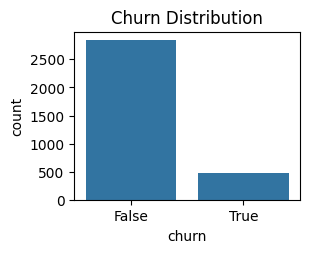

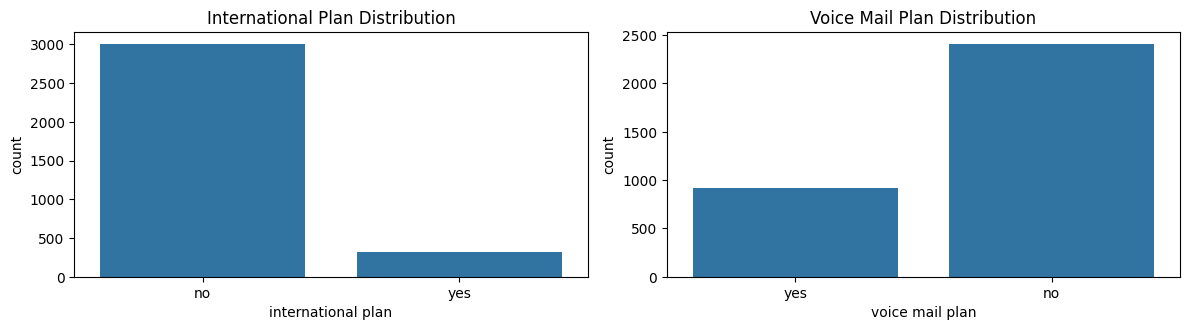


Phone Number Analysis:
Number of unique phone numbers: 3333
Most common phone numbers:
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64


In [46]:
categorical_var = ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']
# Create an empty dictionary to store value counts for each categorical column
value_counts_summary = {}

# Calculate value counts for each categorical column
for col in categorical_var:
    value_counts_summary[col] = df[col].value_counts()

# Print summary of value counts for each categorical column
print("Summary of Value Counts for Categorical Columns:")
for col, counts in value_counts_summary.items():
    print(f"\n{col}:")
    print(counts)

# Plotting the churn distribution using Seaborn
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')

# Plotting categorical variables with Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='international plan')
plt.title('International Plan Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='voice mail plan')
plt.title('Voice Mail Plan Distribution')

plt.tight_layout()
plt.show()

# Analyzing the 'phone_number' column
print("\nPhone Number Analysis:")
print("Number of unique phone numbers:", df['phone number'].nunique())
print("Most common phone numbers:")
print(df['phone number'].value_counts()) #.head())
